In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For reproducibility
np.random.seed(1)

Let's design overall scheme.

In [3]:
# inputs
x = np.linspace(0, 1, 100, dtype=np.float32)

# ground truth
slopes = np.random.normal(1, 0.5, 100).astype(np.float32)
intercept = 2.

# outputs
y = x * slopes + intercept

In [4]:
slopes

array([ 1.81217265,  0.69412178,  0.73591411,  0.4635157 ,  1.43270385,
       -0.15076935,  1.87240589,  0.61939657,  1.15951955,  0.87531483,
        1.73105395, -0.03007036,  0.83879137,  0.80797285,  1.56688476,
        0.45005438,  0.91378587,  0.5610708 ,  1.02110684,  1.29140759,
        0.4496904 ,  1.57236183,  1.45079541,  1.25124717,  1.45042801,
        0.65813607,  0.93855488,  0.53211528,  0.86605597,  1.26517773,
        0.65416962,  0.80162323,  0.65641367,  0.57739717,  0.66437691,
        0.99366772,  0.44134483,  1.11720788,  1.8299011 ,  1.37102211,
        0.90408224,  0.55618554,  0.62642086,  1.84622729,  1.02540386,
        0.68150216,  1.09545779,  2.05012751,  1.06007946,  1.3086015 ,
        1.15008521,  0.82387507,  0.42874089,  0.82532865,  0.89555287,
        1.2933116 ,  1.41949165,  1.46555102,  1.14279366,  1.44257057,
        0.62280101,  1.62643409,  1.25646496,  0.85095358,  1.24425912,
        0.96221417,  1.56581473,  1.75990844,  2.09278774,  0.30

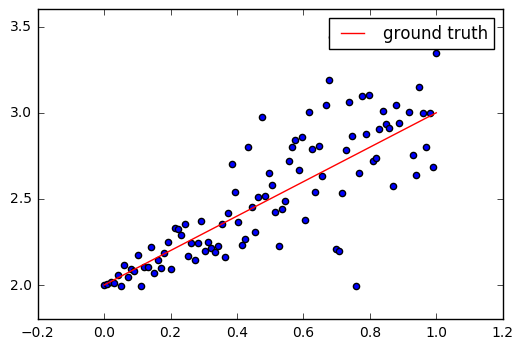

In [5]:
plt.scatter(x, y)
plt.plot(x, x * 1 + 2., label="ground truth", c="r")
plt.legend()
plt.show()

Build a graph

In [6]:
x.dtype

dtype('float32')

In [7]:
y.dtype

dtype('float32')

In [8]:
x.shape

(100,)

In [9]:
y.shape

(100,)

In [10]:
# Inputs
x_pl = tf.placeholder(tf.float32, [100,], name="x_pl")
y_pl = tf.placeholder(tf.float32, [100,], name="y_pl")

In [11]:
# Computation
## Variables = Parameters = Weights
w = tf.Variable(.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [12]:
## prediction = y_hat = hypothesis
preds = x_pl * w + b # (100,)

In [13]:
# objective = loss = cost
loss = tf.reduce_mean(tf.square(preds - y)) # L2 loss

In [14]:
# Optimization = Training
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)
train_op = optimizer.minimize(loss)

Launch the graph

In [15]:
# start a session
sess = tf.Session()

In [16]:
# initialize all variables
sess.run(tf.global_variables_initializer())

In [17]:
loss_list, w_list, b_list = [], [], []
for epoch in range(1, 21):
    _, _loss, _w, _b = sess.run([train_op, loss, w, b], {x_pl:x, y_pl:y})
#     print(epoch, "\t", _loss, "\t", _w, "\t", _b)
    loss_list.append(_loss)
    w_list.append(_w)
    b_list.append(_b)

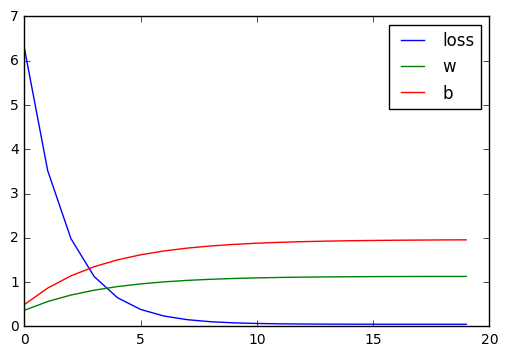

In [18]:
plt.plot(loss_list, label="loss")
plt.plot(w_list, label="w")
plt.plot(b_list, label="b")
plt.legend()
plt.show()